# **Entangled States**


## Multi-Qubit States

We saw that a single bit has two possible states, and a qubit state has two complex amplitudes. Similarly, two bits have four possible states:

`00` `01` `10` `11`

And to describe the state of two qubits requires four complex amplitudes. We store these amplitudes in a 4D-vector like so:

$$ |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

The rules of measurement still work in the same way:

$$ p(|00\rangle) = |\langle 00 | a \rangle |^2 = |a_{00}|^2$$

And the same implications hold, such as the normalisation condition:

$$ |a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1$$

If we have two separated qubits, we can describe their collective state using the tensor product:

$$ |a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$

$$ 
|ab\rangle = |a\rangle \otimes |b\rangle = \begin{bmatrix} a_0 \times \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \\ a_1 \times \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} a_0 b_0 \\ a_0 b_1 \\ a_1 b_0 \\ a_1 b_1 \end{bmatrix}
$$

And following the same rules, we can use the tensor product to describe the collective state of any number of qubits. Here is an example with three qubits:

$$ 
|abc\rangle = \begin{bmatrix} a_0 b_0 c_0 \\ a_0 b_0 c_1 \\ a_0 b_1 c_0 \\ a_0 b_1 c_1 \\
                              a_1 b_0 c_0 \\ a_1 b_0 c_1 \\ a_1 b_1 c_0 \\ a_1 b_1 c_1 \\
              \end{bmatrix}
$$

If we have $n$ qubits, we will need to keep track of $2^n$ complex amplitudes. As we can see, these vectors grow exponentially with the number of qubits. This is the reason quantum computers with large numbers of qubits are so difficult to simulate. A modern laptop can easily simulate around 20 qubits, but 100 qubits is too difficult for the largest supercomputers.

Let's look at an example circuit:

In [1]:
import qiskit as qpk
from math import pi
import numpy as np
import sympy as sp
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
qc = qpk.QuantumCircuit(3) # Select 3 qubits in out circuit


for qubit in range(3):
    qc.h(qubit) # apply H gate to each qubit

qc.draw()

┌───┐
q_0: |0>┤ H ├
        ├───┤
q_1: |0>┤ H ├
        ├───┤
q_2: |0>┤ H ├
        └───┘

Each qubit is in the state $|+\rangle$, so we should see the vector:

$$ 
|{+++}\rangle = \frac{1}{\sqrt{8}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\
                              1 \\ 1 \\ 1 \\ 1 \\
              \end{bmatrix}
$$

In [4]:
backend = qpk.Aer.get_backend('statevector_simulator')
final_state = qpk.execute(qc,backend).result().get_statevector()
final_state

array([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
       0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j])

Correspondig with the amplitudes of each state

**Exercise 1.** Write down the tensor product of the qubits:

$ |0\rangle|1\rangle $   
$ |0\rangle|+\rangle $   
$ |+\rangle|1\rangle $  
$ |-\rangle|+\rangle $  
    

$$ 
|01\rangle = |0\rangle \otimes |1\rangle = \begin{bmatrix} 1 \times \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\ 0 \times \begin{bmatrix} 0 \\ 1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} 1 * 0 \\ 1 * 1 \\ 0 * 0 \\ 0 * 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}
$$

$$ 
|0+\rangle = |0\rangle \otimes |+\rangle = {{1}\over{\sqrt 2}} \begin{bmatrix} 1 \times \begin{bmatrix} 1 \\ 1 \end{bmatrix} \\ 0 \times \begin{bmatrix} 1 \\ 1 \end{bmatrix} \end{bmatrix} = {{1}\over{\sqrt 2}} \begin{bmatrix} 1 * 1 \\ 1 * 1 \\ 0 * 1 \\ 0 * 1 \end{bmatrix} = {{1}\over{\sqrt 2}} \begin{bmatrix} 1 \\ 1 \\ 0 \\ 0 \end{bmatrix}
$$

$$ 
|+1\rangle = |+\rangle \otimes |1\rangle = {{1}\over{\sqrt 2}}\begin{bmatrix} 1 \times \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\ 1 \times \begin{bmatrix} 0 \\ 1 \end{bmatrix} \end{bmatrix} = {{1}\over{\sqrt 2}} \begin{bmatrix} 1 * 0 \\ 1 * 1 \\ 1 * 0 \\ 1 * 1 \end{bmatrix} = {{1}\over{\sqrt 2}} \begin{bmatrix} 0 \\ 1 \\ 0 \\ 1 \end{bmatrix}
$$

$$ 
|-+\rangle = |-\rangle \otimes |+\rangle = {{1}\over{ 2}}\begin{bmatrix} 1 \times \begin{bmatrix} 1 \\ 1 \end{bmatrix} \\ -1 \times \begin{bmatrix} 1 \\ 1 \end{bmatrix} \end{bmatrix} = {{1}\over{ 2}} \begin{bmatrix} 1 * 1 \\ 1 * 1 \\ -1 * 1 \\ -1 * 1 \end{bmatrix} ={{1}\over{ 2}} \begin{bmatrix} 1 \\ 1 \\ -1 \\ -1 \end{bmatrix}
$$

**Exercise 2.** Write the state:
    $|\psi\rangle = \tfrac{1}{\sqrt{2}}|00\rangle + \tfrac{i}{\sqrt{2}}|01\rangle $ as two separate qubits.

$$ 
|\psi\rangle = \tfrac{1}{\sqrt{2}}|00\rangle + \tfrac{i}{\sqrt{2}}|01\rangle = |0\rangle \otimes |q\rangle = {{1}\over{\sqrt 2}}\begin{bmatrix} 1 \times \begin{bmatrix} 1 \\ i \end{bmatrix} \\ 0 \times \begin{bmatrix} 1 \\ i \end{bmatrix} \end{bmatrix} = {{1}\over{\sqrt 2}} \begin{bmatrix} 1 * 1 \\ 1 * i \\ 0* 1 \\ 0 * i \end{bmatrix} = {{1}\over{\sqrt 2}} \begin{bmatrix} 1 \\ i \\ 0 \\ 0 \end{bmatrix} = |0q\rangle
$$

## Single Gates On Multi-Qubit Statevectors

We have seen that an X-gate is represented by the matrix:

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$

And that it acts on the state $|0\rangle$ as so:

$$
X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1\end{bmatrix}
$$

but it may not be clear how an X-gate would act on a qubit in a multi-qubit vector. Fortunately, the rule is quite simple; just as we used the tensor product to calculate multi-qubit statevectors, we use the tensor product to calculate matrices that act on these statevectors. For example, in the circuit below:

In [5]:
qc = qpk.QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: |0>┤ H ├
        ├───┤
q_1: |0>┤ X ├
        └───┘

we can represent the simultaneous operations (H & X) using their tensor product:

$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

The operation looks like this:

$$
X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\ 
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
$$

Which we can then apply to our 4D statevector $|q_1 q_0\rangle$. This can become quite messy, you will often see the clearer notation:

$$
X\otimes H = 
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$

In [6]:
backend = qpk.Aer.get_backend('unitary_simulator')
unitary = qpk.execute(qc,backend).result().get_unitary()

In [7]:
sp.Matrix(unitary)

Matrix([
[                0,                                           0, 0.707106781186548,  0.707106781186547 - 8.65956056235493e-17*I],
[                0,                                           0, 0.707106781186547, -0.707106781186548 + 8.65956056235493e-17*I],
[0.707106781186548,  0.707106781186547 - 8.65956056235493e-17*I,                 0,                                           0],
[0.707106781186547, -0.707106781186548 + 8.65956056235493e-17*I,                 0,                                           0]])

If we want to apply a gate to only one qubit at a time, we must fill in the space on the other qubits with the identity gate:

In [8]:
qc = qpk.QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: |0>─────
        ┌───┐
q_1: |0>┤ X ├
        └───┘

In [9]:
# Simulate the unitary
backend = qpk.Aer.get_backend('unitary_simulator')
unitary = qpk.execute(qc,backend).result().get_unitary()

# Display the results:
sp.Matrix(unitary)

Matrix([
[  0,   0, 1.0,   0],
[  0,   0,   0, 1.0],
[1.0,   0,   0,   0],
[  0, 1.0,   0,   0]])

We can see Qiskit has performed the tensor product:
$$
X \otimes I =
\begin{bmatrix} 0 & I \\
               I & 0\\
\end{bmatrix} = 
\begin{bmatrix} 0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                1 & 0 & 0 & 0 \\
                0 & 1 & 0 & 0 \\
\end{bmatrix}
$$


**Exercise 3.** Calculate the single qubit unitary ($U$) created by the squence of gates: $U = XZH$. Use Qiskit's unitary simulator to check your results.

$$
E = Z \otimes H = 
{{1}\over{\sqrt 2}}\begin{bmatrix} H & 0 \\
               0 & -H\\
\end{bmatrix}
$$

$$
X\otimes Z \otimes H = X\otimes E = {{1}\over{\sqrt 2}}
\begin{bmatrix} 0 & E \\
               E & 0\\
\end{bmatrix}
$$

In [10]:
qc = qpk.QuantumCircuit(3)
qc.h(0)
qc.z(1)
qc.x(2)
qc.draw()

┌───┐
q_0: |0>┤ H ├
        ├───┤
q_1: |0>┤ Z ├
        ├───┤
q_2: |0>┤ X ├
        └───┘

In [11]:
# Simulate the unitary
backend = qpk.Aer.get_backend('unitary_simulator')
unitary = qpk.execute(qc,backend).result().get_unitary()

# Display the results:
sp.Matrix(unitary)

Matrix([
[                0,                                           0,                  0,                                           0, 0.707106781186548,  0.707106781186547 - 8.65956056235493e-17*I,                  0,                                           0],
[                0,                                           0,                  0,                                           0, 0.707106781186547, -0.707106781186548 + 8.65956056235493e-17*I,                  0,                                           0],
[                0,                                           0,                  0,                                           0,                 0,                                           0, -0.707106781186548, -0.707106781186547 + 8.65956056235493e-17*I],
[                0,                                           0,                  0,                                           0,                 0,                                           0, -0.70710678118654

$$
E = Z \otimes H = 
\begin{bmatrix} H & 0 \\
               0 & -H\\
\end{bmatrix}
$$

$$
X\otimes Z \otimes H = X\otimes E = 
\begin{bmatrix} 0 & E \\
               E & 0\\
\end{bmatrix}
$$

**Exercise 4.** Try changing the gates in the circuit above. Calculate their tensor product, and then check your answer using the unitary simulator.

$$
E = Z \otimes X = 
\begin{bmatrix} X & 0 \\
               0 & -X\\
\end{bmatrix}
$$

$$
H\otimes Z \otimes X = H\otimes E = {{1}\over{\sqrt 2}}
\begin{bmatrix} E & E \\
               E & -E\\
\end{bmatrix}
$$

In [12]:
qc = qpk.QuantumCircuit(3)
qc.x(0)
qc.z(1)
qc.h(2)
qc.draw()

┌───┐
q_0: |0>┤ X ├
        ├───┤
q_1: |0>┤ Z ├
        ├───┤
q_2: |0>┤ H ├
        └───┘

In [13]:
# Simulate the unitary
backend = qpk.Aer.get_backend('unitary_simulator')
unitary = qpk.execute(qc,backend).result().get_unitary()

# Display the results:
sp.Matrix(unitary)

Matrix([
[                0, 0.707106781186548,                  0,                  0,                                           0,  0.707106781186547 - 8.65956056235493e-17*I,                                           0,                                           0],
[0.707106781186548,                 0,                  0,                  0,  0.707106781186547 - 8.65956056235493e-17*I,                                           0,                                           0,                                           0],
[                0,                 0,                  0, -0.707106781186548,                                           0,                                           0,                                           0, -0.707106781186547 + 8.65956056235493e-17*I],
[                0,                 0, -0.707106781186548,                  0,                                           0,                                           0, -0.707106781186547 + 8.65956056235493e-17*

## Multi-Qubit Gates

Now we know how to represent the state of multiple qubits, we are now ready to learn how qubits interact with each other. The most popular two-qubit gate is the CNOT-gate.

### The CNOT-Gate

You have come across this gate before in _The Atoms of Computation._ This gate is a conditional gate that performs an X-gate on the second qubit (target), if the state of the first qubit (control) is $|1\rangle$. The gate is drawn on a circuit like this, with `q0` as the control and `q1` as the target:

In [14]:
qc = qpk.QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit
qc.draw()

q_0: |0>──■──
        ┌─┴─┐
q_1: |0>┤ X ├
        └───┘

When our qubits are not in superposition of $|0\rangle$ or $|1\rangle$, this gate is very simple and intuitive to understand. Acting on our 4D-statevector, it has one of the two matrices:

$$
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
              \end{bmatrix}, \quad
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix}
$$

depending on which qubit is the control and which is the target. Different books, simulators and papers order their qubits differently, this can prove very confusing when starting out. In our case, the left matrix corresponds to the CNOT in the circuit above. This matrix swaps the amplitudes of $|01\rangle$ and $|11\rangle$ in our statevector:

$$ 
|a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|a\rangle = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

We have seen how this acts on classical states, but let’s now see how it acts on a qubit in superposition. We will put one qubit in the state $|+\rangle$:

In [15]:
qc = qpk.QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
qc.draw()

┌───┐
q_0: |0>┤ H ├
        └───┘
q_1: |0>─────

In [16]:
# Let's see the result:
backend = qpk.Aer.get_backend('statevector_simulator')
final_state = qpk.execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
sp.Matrix(final_state)

Matrix([
[0.707106781186548],
[0.707106781186547],
[                0],
[                0]])

As expected, this produces the state $|0\rangle \otimes |{+}\rangle = |0{+}\rangle$:

$$
|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle)
$$

And let’s see what happens when we apply the CNOT gate:

In [17]:
qc = qpk.QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: |0>┤ H ├──■──
        └───┘┌─┴─┐
q_1: |0>─────┤ X ├
             └───┘

In [18]:
# Let's see the result:
backend = qpk.Aer.get_backend('statevector_simulator')
final_state = qpk.execute(qc,backend).result().get_statevector()
# Print the statevector neatly:
sp.Matrix(final_state)

Matrix([
[0.707106781186548],
[                0],
[                0],
[0.707106781186547]])

We see we have the state:

$$
\text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

This state is very interesting to us, because it is _entangled._ This leads us neatly on to the next section.

### Entangled States

We saw in the previous section we could create the state:

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$ 

This is known as a _Bell_ state. We can see that this state has 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. Most interestingly, it has a **0%** chance of being measured in the states $|01\rangle$ or $|10\rangle$. We can see this in Qiskit:

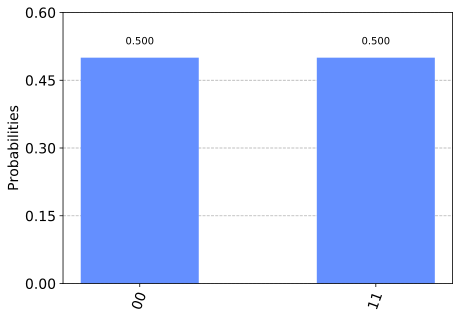

In [19]:
results = qpk.execute(qc,backend).result().get_counts()
plot_histogram(results)

This has interesting implications. Although our qubits are in superposition, measuring one will tell us the state of the other and collapse its superposition. For example, if we measured the top qubit and got the state $|1\rangle$, the collective state of our qubits changes:

$$
\tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \xrightarrow[]{\text{measure}} \quad |11\rangle
$$

This is the apparent ‘spooky action at a distance’ that upset so many physicists in the early 20th century. Even if we separated these qubits light-years away, it appears as if measuring one qubit has an effect on the other, with faster-than-light communication between them.

This is one interpretation of the effects of entanglement, you may have heard of others such as the 'many worlds' interpretation, but these interpretations are untestable and thus stray from physics into philosophy. There is however an important thing to note:

> Since the measurement result is random, we can **not** use entangled states to communicate in this way.

(This is the result of a theorem known as the *no-communication theorem*). There is a common misconception that we could use entangled states to communicate faster than the speed of light, we can see from the above statement that this is not true.


**Exercise 4.** Create a quantum circuit that produces the Bell state: $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$.
   Use the statevector simulator to verify your result.

In [20]:
qc = qpk.QuantumCircuit(2)

qc.h(0) # Change 0 -> 0 1
qc.x(1) # Change 0 -> 1

qc.cx(0,1) # CNOT gate

qc.draw()

┌───┐     
q_0: |0>┤ H ├──■──
        ├───┤┌─┴─┐
q_1: |0>┤ X ├┤ X ├
        └───┘└───┘

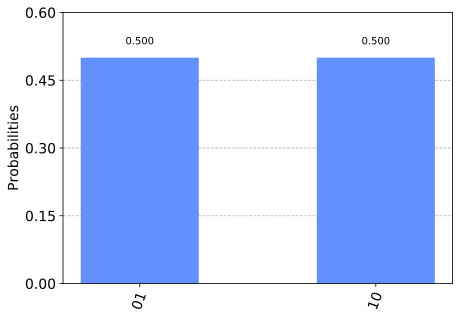

In [21]:
results = qpk.execute(qc,backend).result().get_counts()
plot_histogram(results)

In [22]:
backend = qpk.Aer.get_backend('statevector_simulator')
final_state = qpk.execute(qc,backend).result().get_statevector()

sp.Matrix(final_state)

Matrix([
[                0],
[0.707106781186547],
[0.707106781186548],
[                0]])